In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_excel("auto_data.xlsx")

In [4]:
df.head()

,Unnamed: 0,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Yeni,Vəziyyəti,Qiymət,Link
0,0,Nissan,X-Trail,2023,Offroader / SUV,Boz,2.5 L/184 a.g./Benzin,0 km,Avtomat,Bəli,"Vuruğu yoxdur, rənglənməyib",55 000 AZN,https://turbo.az/autos/7947885-nissan-x-trail
1,1,BMW,630,2005,Kabriolet,Qara,3.0 L/258 a.g./Benzin,12 706 km,Avtomat,Xeyr,"Vuruğu yoxdur, rənglənməyib",35 800 USD,https://turbo.az/autos/7785808-bmw-630
2,2,MG,ZS,2023,Offroader / SUV,Ağ,1.5 L/118 a.g./Benzin,0 km,Avtomat,Bəli,"Vuruğu yoxdur, rənglənməyib",21 470 USD,https://turbo.az/autos/7808576-mg-zs
3,3,BMW,M8,2022,Kupe,Qara,4.4 L/625 a.g./Benzin,12 000 km,Avtomat,Xeyr,"Vuruğu yoxdur, rənglənməyib",220 999 USD,https://turbo.az/autos/7596985-bmw-m8
4,4,Hyundai,Santa Fe,2013,Offroader / SUV,Ağ,2.4 L/175 a.g./Benzin,158 000 km,Avtomat,Xeyr,"Vuruğu yoxdur, rənglənməyib",36 300 AZN,https://turbo.az/autos/7919450-hyundai-santa-fe


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unnamed: 0       1050 non-null   int64 
 1   marka            1050 non-null   object
 2   model            1050 non-null   object
 3   buraxılış ili    1050 non-null   int64 
 4   ban növü         1050 non-null   object
 5   rəng             1050 non-null   object
 6   mühərrik         1050 non-null   object
 7   yürüş            1050 non-null   object
 8   sürətlər qutusu  1050 non-null   object
 9   yeni             1050 non-null   object
 10  vəziyyəti        731 non-null    object
 11  qiymət           1050 non-null   object
 12  link             1050 non-null   object
dtypes: int64(2), object(11)
memory usage: 106.8+ KB


In [7]:
df.shape

(1050, 13)

## Data Wrangling and Data Cleaning

In [8]:
# remove unnecessary columns
df.drop(["unnamed: 0", "link", "model"], axis=1, inplace=True)

# calculate age of car from edition year 
df["yaş"] = df["buraxılış ili"].apply(lambda x: datetime.today().year - x)
# remove edition year from dataset
df.drop("buraxılış ili", axis=1, inplace=True)

In [9]:
for i in df.drop(["yaş", "yürüş"], axis=1).columns:
    print("\033[1m" + i+ "\033[0m", '⟹' , df[i].unique())

marka ⟹ ['Nissan' 'BMW' 'MG' 'Hyundai' 'Cadillac' 'Audi' 'Kia' 'Mercedes' 'Jeep'
 'Toyota' 'Chevrolet' 'Lincoln' 'Volkswagen' 'Khazar' 'Mitsubishi'
 'Daewoo' 'Renault' 'Geely' 'Fiat' 'GAZ' 'KamAz' 'Bestune' 'Ford'
 'Land Rover' 'Opel' 'Li Auto' 'Changan' 'Chrysler' 'Honda' 'LADA (VAZ)'
 'Porsche' 'Alfa Romeo' 'Lexus' 'Leapmotor' 'Mazda' 'BYD' 'DAF' 'Zeekr'
 'SEAT' 'Iran Khodro' 'Haima' 'Aprilia' 'UAZ' 'Jetour' 'VGV' 'MAN'
 'Jaguar' 'Infiniti' 'HiPhi' 'Isuzu' 'Mercedes-Maybach' 'Chery' 'HOWO'
 'Skoda' 'Subaru' 'Skywell' 'Suzuki' 'DFSK' 'BMW Alpina' 'Rolls-Royce'
 'Tofas' 'Ducati' 'Dacia' 'Foton' 'FAW']
ban növü ⟹ ['Offroader / SUV' 'Kabriolet' 'Kupe' 'Sedan' 'Hetçbek' 'Universal'
 'Yük maşını' 'Minivan' 'Furqon' 'Liftbek' 'Dartqı' 'Motosiklet' 'Avtobus'
 'Mikroavtobus' 'Pikap']
rəng ⟹ ['Boz' 'Qara' 'Ağ' 'Qırmızı' 'Yaş Asfalt' 'Göy' 'Gümüşü' 'Bej' 'Mavi'
 'Tünd qırmızı' 'Yaşıl' 'Qəhvəyi' 'Sarı' 'Narıncı' 'Qızılı']
mühərrik ⟹ ['2.5 L/184 a.g./Benzin' '3.0 L/258 a.g./Benzin' '1.5 L/118 a.g

In [10]:
df["mühərrik"]= df["mühərrik"].str.split('/').str[-1]
df["yürüş"]= df["yürüş"].str.replace('km', '').str.replace(' ', '').str.strip().astype('int64')

In [11]:
qiymət = []

for i in df['qiymət']:
    if 'USD' in i:
        val = i.replace('USD', '').strip().replace(' ', '')
        val_azn = int(val) * 1.70
        qiymət.append(round(val_azn))
    elif 'EUR' in i:
        val = i.replace('EUR', '').strip().replace(' ', '')
        val_eur = int(val) * 1.82
        qiymət.append(round(val_eur))
    else:
        val = i.replace('AZN', '').strip().replace(' ', '')
        qiymət.append(val)
df['qiymət'] =qiymət

df['qiymət'] = df['qiymət'].astype('int64')

In [12]:
# Descriptive statistics descriptions for numerical data
df.describe()

,yürüş,qiymət,yaş
count,1.050000e+03,1050.000000,1050.000000
mean,1.467587e+05,52954.921905,10.627619
std,1.507985e+05,71588.506210,7.865977
min,0.000000e+00,2850.000000,1.000000
25%,3.256200e+04,16900.000000,4.000000
50%,1.277000e+05,31350.000000,10.000000
75%,1.980000e+05,58650.000000,15.000000
max,1.200000e+06,544000.000000,48.000000


In [13]:
df.describe(include=['object'])

,marka,ban növü,rəng,mühərrik,sürətlər qutusu,yeni,vəziyyəti
count,1050,1050,1050,1050,1050,1050,731
unique,65,15,15,6,4,2,4
top,Hyundai,Offroader / SUV,Ağ,Benzin,Avtomat,Xeyr,"Vuruğu yoxdur, rənglənməyib"
freq,119,426,323,650,850,903,668


Null values

In [14]:
df.isnull().sum()

marka                0
ban növü             0
rəng                 0
mühərrik             0
yürüş                0
sürətlər qutusu      0
yeni                 0
vəziyyəti          319
qiymət               0
yaş                  0
dtype: int64

In [15]:
df["vəziyyəti"].fillna(df["vəziyyəti"].mode()[0], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   marka            1050 non-null   object
 1   ban növü         1050 non-null   object
 2   rəng             1050 non-null   object
 3   mühərrik         1050 non-null   object
 4   yürüş            1050 non-null   int64 
 5   sürətlər qutusu  1050 non-null   object
 6   yeni             1050 non-null   object
 7   vəziyyəti        1050 non-null   object
 8   qiymət           1050 non-null   int64 
 9   yaş              1050 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 82.2+ KB


<Axes: >

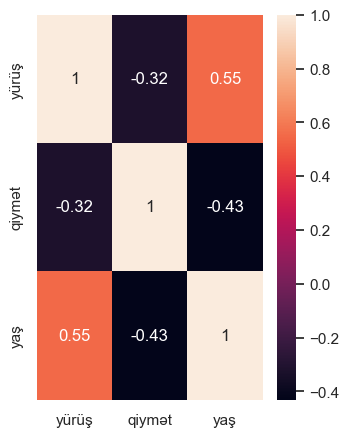

In [17]:
sns.set(rc={"figure.figsize": (6, 5)})
plt.figure(figsize=(8, 5))

# Pearson correlation matrix ()
plt.subplot(1, 2,1)
corr = df[["yürüş","qiymət", "yaş"]].corr()
sns.heatmap(corr, annot= True)

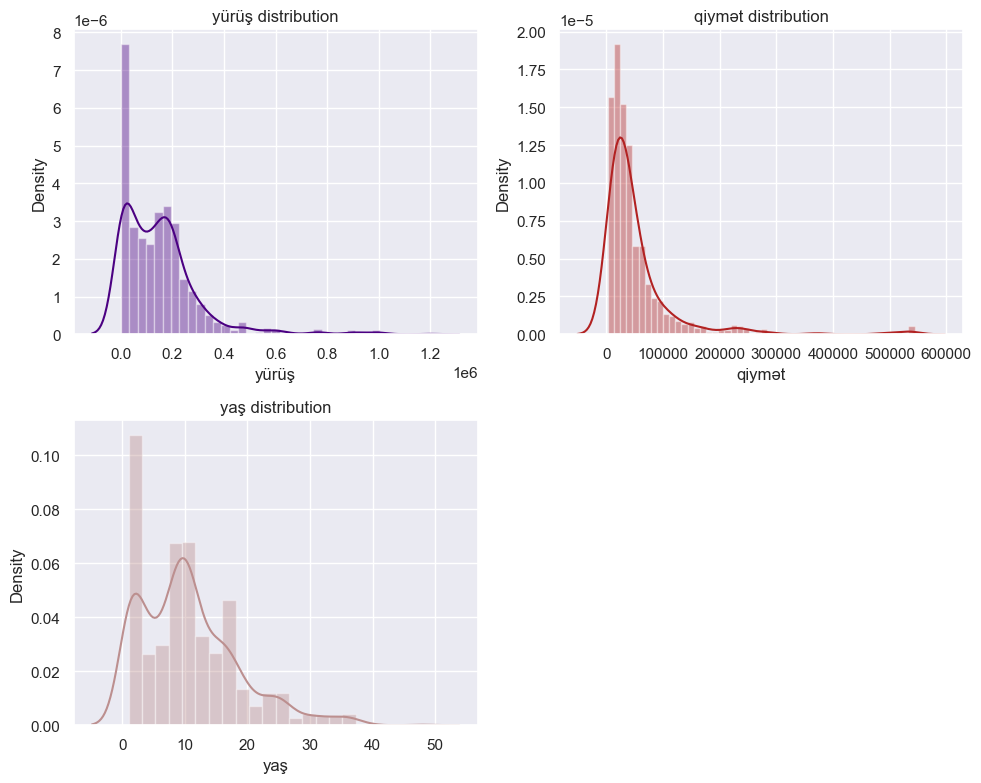

In [18]:
sns.set(rc={"figure.figsize": (10, 8)})
i=1
for col in ["yürüş","qiymət", "yaş"]:
    colors = ['rosybrown', 'slateblue', 'indigo', 'firebrick']
    plt.subplot(2,2,i)
    sns.distplot(df[col],  kde=True, color = np.random.choice(colors, replace=False))
    plt.title(col + ' ' + 'distribution')
    i+=1
    
plt.tight_layout()
plt.show()

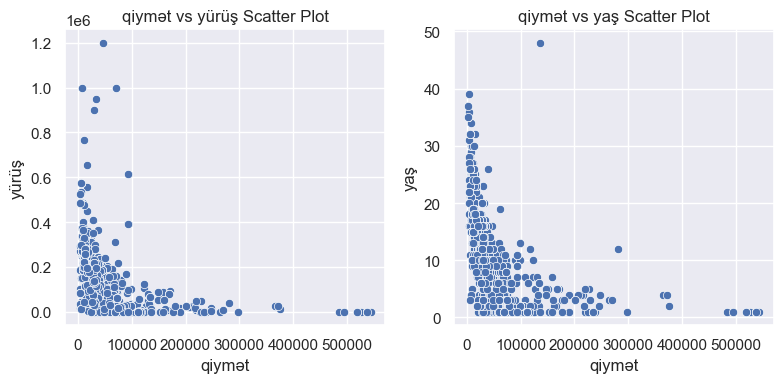

In [109]:
sns.set(rc={"figure.figsize": (8, 4)})
i=1
for col in ["yürüş","yaş"]:
    plt.subplot(1,2,i)
    sns.scatterplot(x=df["qiymət"],  y= df[col])
    plt.title('qiymət vs ' + col+ ' Scatter Plot')
    i+=1
    
plt.tight_layout()
plt.show()

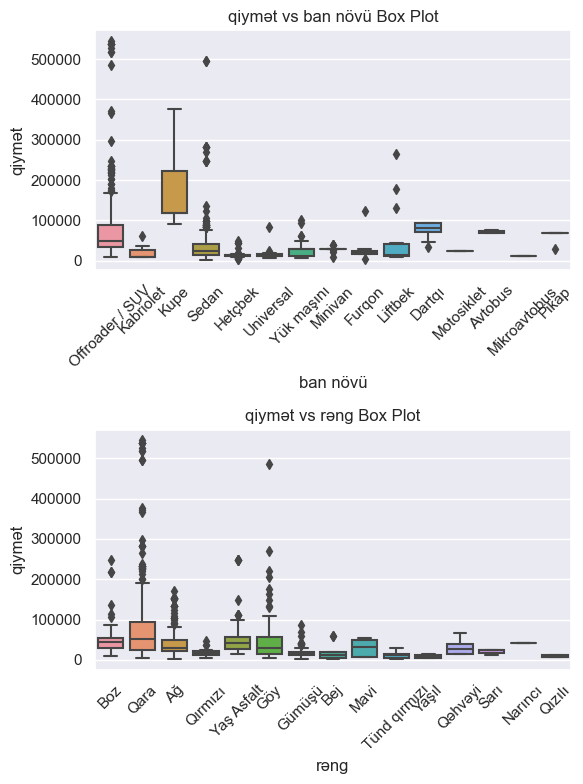

In [124]:
sns.set(rc={"figure.figsize": (6, 8)})
i=1
for col in ["ban növü", "rəng"]:
    plt.subplot(2,1,i)
    sns.boxplot(x=df[col],  y= df["qiymət"])
    plt.title('qiymət vs ' + col+ ' Box Plot')
    plt.xticks(rotation=45)
    i+=1
    
plt.tight_layout()
plt.show()

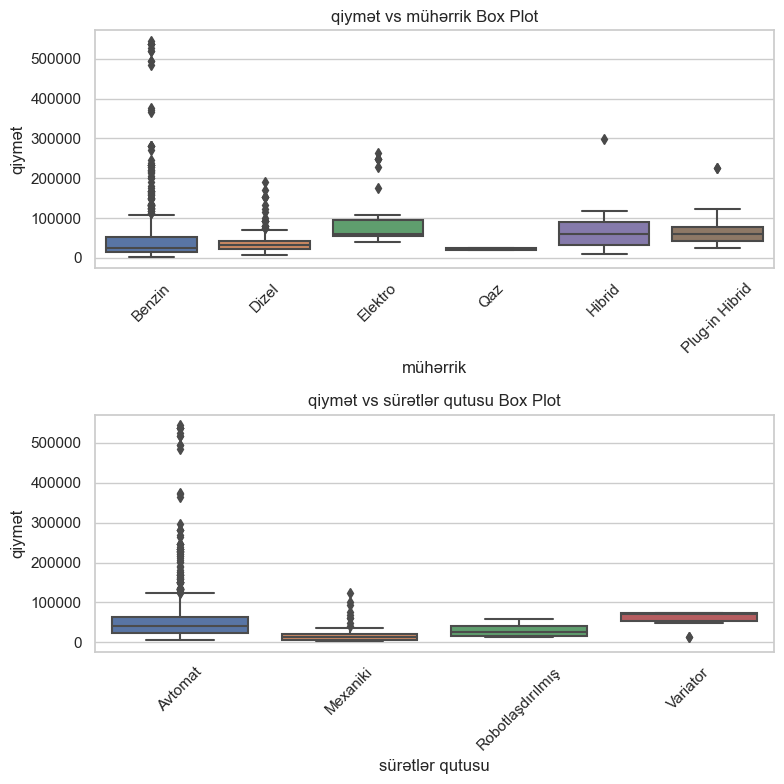

In [138]:
sns.set(rc={"figure.figsize": (8, 8)})
sns.set(style="whitegrid", font_scale=1)
i=1
for col in ["mühərrik", "sürətlər qutusu"]:
    plt.subplot(2,1,i)
    sns.boxplot(x=df[col],  y= df["qiymət"])
    plt.title('qiymət vs ' + col+ ' Box Plot')
    plt.xticks(rotation=45)
    i+=1
    
plt.tight_layout()
plt.show()

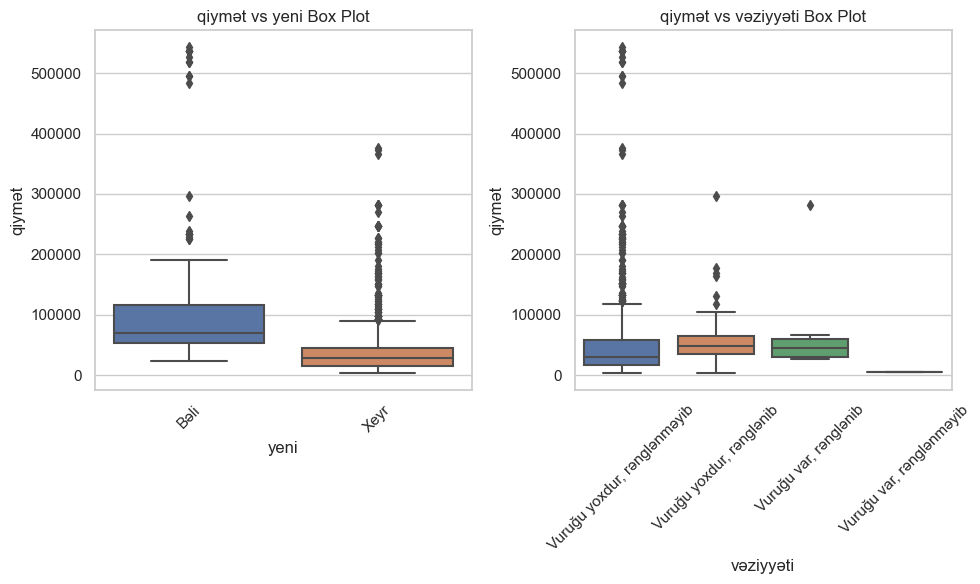

In [144]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.set(style="whitegrid", font_scale=1)
i=1
for col in ["yeni", "vəziyyəti"]:
    plt.subplot(1,2,i)
    sns.boxplot(x=df[col],  y= df["qiymət"])
    plt.title('qiymət vs ' + col+ ' Box Plot')
    plt.xticks(rotation=45)
    i+=1
    
plt.tight_layout()
plt.show()

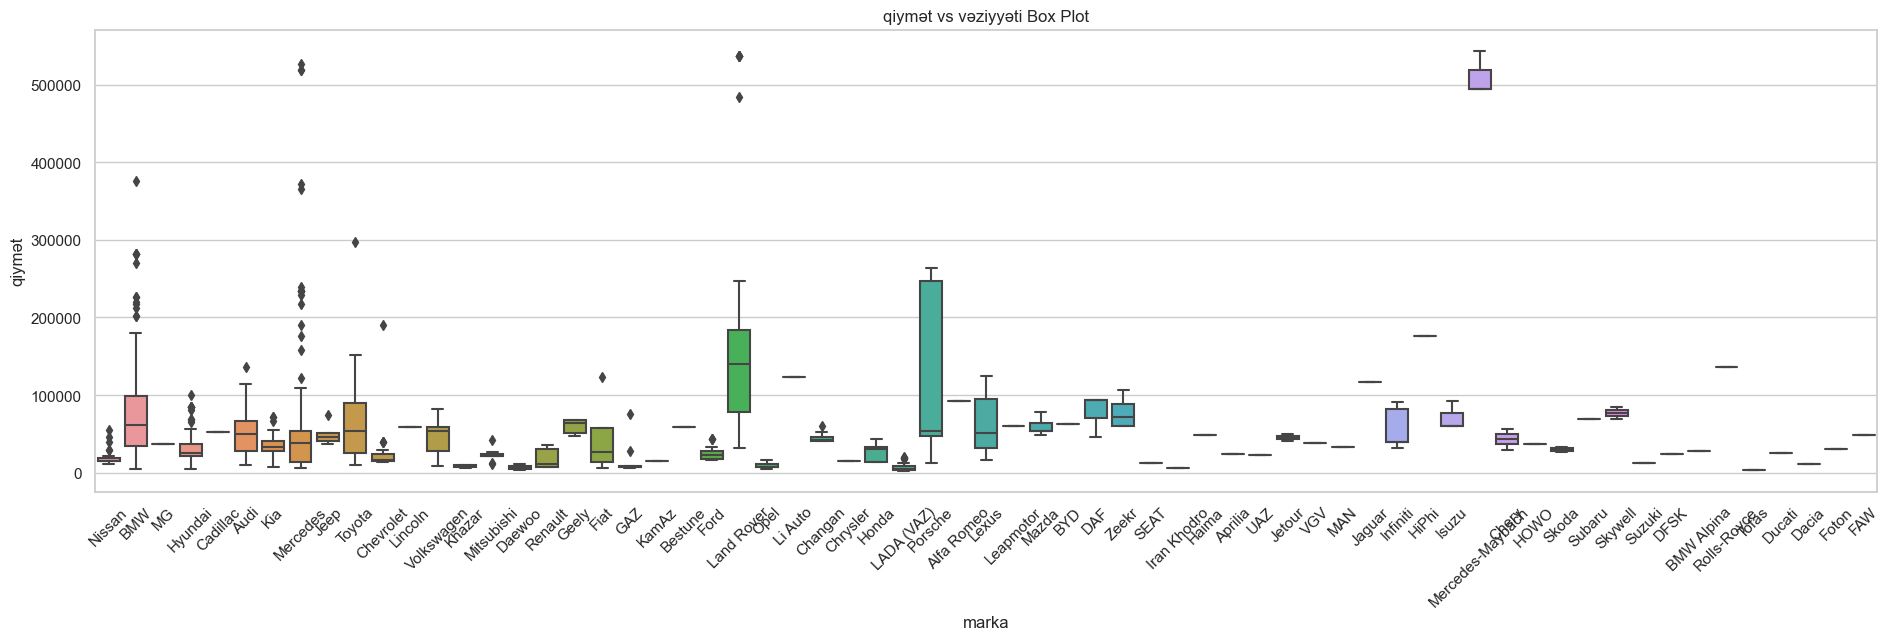

In [148]:
sns.set(rc={"figure.figsize": (23, 6)})
sns.set(style="whitegrid", font_scale=1)
sns.boxplot(x=df['marka'],  y= df["qiymət"])
plt.title('qiymət vs ' + col+ ' Box Plot')
plt.xticks(rotation=45)
plt.show()

In [177]:
df_1 =df.copy()
for i in ['yürüş', 'yaş']:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
        
    values=[]
    for x in df[i]:
        # if value is between lower_bound and upper_bound append list
        if x>=lower_bound and x<=upper_bound:
            values.append(x)
            # add NaN to list if value is above upper_bpund or below lower_bound
        else:
            values.append(np.nan)
    df_1[i]=values 

In [178]:
df = df_1

In [179]:
df.isnull().sum()

marka               0
ban növü            0
rəng                0
mühərrik            0
yürüş              45
sürətlər qutusu     0
yeni                0
vəziyyəti           0
qiymət              0
yaş                25
dtype: int64

In [180]:
df.dropna(axis=0, inplace=True)

Encoding categorical data

In [181]:
# select categorical variables
categorical_data = df.drop(['yürüş', 'yaş', 'qiymət'], axis=1)

le=LabelEncoder()
data_encoded = categorical_data.apply(le.fit_transform)


df= pd.concat([data_encoded, df[['yürüş', 'yaş', 'qiymət']]], axis=1)



In [182]:
df.to_csv("auto_data_cleaned.csv", index=False)